In [1]:
import matplotlib.pyplot as plt
import plotly as ply
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("./dati_polveri/polveri_emilia_PM10.csv")
df.head()

,02000003_005_202007.csv,COD_STAZ,ID_PARAM,DATA_INIZIO,DATA_FINE,VALORE,UM,Anno,Mese,Giorno,...,Mesenome,Stazione,COMUNE,INDIRIZZO,PROVINCIA,Altezza,PARAMETRO,TipoStazione,TipoArea,Zonizzazione
0,02000003_005_202007.txt,2000003,5,43831,43832,52,ug/m3,2020,1,1,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
1,02000003_005_202007.txt,2000003,5,43832,43833,59,ug/m3,2020,1,2,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
2,02000003_005_202007.txt,2000003,5,43833,43834,45,ug/m3,2020,1,3,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
3,02000003_005_202007.txt,2000003,5,43834,43835,42,ug/m3,2020,1,4,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
4,02000003_005_202007.txt,2000003,5,43835,43836,31,ug/m3,2020,1,5,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest


In [3]:
def string_date(anno,mese,giorno):
    return str(anno)+"-"+str(mese).zfill(2)+"-"+str(giorno).zfill(2)

In [4]:
#res = df[(df['Stazione']=='MARECCHIA')]
res = df[df['Anno'] == 2018].copy()
aux_df = res[['Anno','Mese', 'Giorno', 'Stazione', 'VALORE']].copy()
aux_df['VALORE'].replace(to_replace=0, value=1, inplace=True)
lista_date = aux_df.apply(lambda vec : string_date(vec[0],vec[1],vec[2]),axis=1).tolist()
lista_log = aux_df.apply(lambda vec : np.log(vec[4]),axis=1).tolist()

final_df = res[['Stazione','VALORE','TipoStazione','TipoArea','Zonizzazione','Altezza','Mese']].copy()
final_df['Date'] = lista_date
final_df['LogVal'] = lista_log

final_df['Mese'].replace(to_replace=1, value='Gennaio', inplace=True)
final_df['Mese'].replace(to_replace=2, value='Febbraio', inplace=True)
final_df['Mese'].replace(to_replace=3, value='Marzo', inplace=True)
final_df['Mese'].replace(to_replace=4, value='Aprile', inplace=True)
final_df['Mese'].replace(to_replace=5, value='Maggio', inplace=True)
final_df['Mese'].replace(to_replace=6, value='Giugno', inplace=True)
final_df['Mese'].replace(to_replace=7, value='Luglio', inplace=True)
final_df['Mese'].replace(to_replace=8, value='Agosto', inplace=True)
final_df['Mese'].replace(to_replace=9, value='Settembre', inplace=True)
final_df['Mese'].replace(to_replace=10, value='Ottobre', inplace=True)
final_df['Mese'].replace(to_replace=11, value='Novembre', inplace=True)
final_df['Mese'].replace(to_replace=12, value='Dicembre', inplace=True)

final_df['Area_Type'] = final_df['TipoArea']
final_df['Station'] = final_df['Stazione']

final_df['Area_Type'].replace(to_replace='Rurale', value='Rural', inplace=True)
final_df['Area_Type'].replace(to_replace='Urbano', value='Urban', inplace=True)
final_df['Area_Type'].replace(to_replace='Suburbano', value='Suburban', inplace=True)


final_df = final_df.sort_values(by=['Stazione','Date'])
final_df.head()

,Stazione,VALORE,TipoStazione,TipoArea,Zonizzazione,Altezza,Mese,Date,LogVal,Area_Type,Station
75727,BADIA,39,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-01,3.663562,Rural,BADIA
75728,BADIA,13,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-02,2.564949,Rural,BADIA
75729,BADIA,12,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-03,2.484907,Rural,BADIA
75730,BADIA,15,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-04,2.708050,Rural,BADIA
75731,BADIA,34,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-05,3.526361,Rural,BADIA


In [5]:
stazioni_df = final_df.copy()
stazioni_df = stazioni_df.sort_values(by=['Stazione'])
## Ordine: alfabetico
stazioni_df = stazioni_df[['Stazione']]
stazioni_df.drop_duplicates(inplace=True)
stazioni_df = stazioni_df.reset_index()
stazioni_df = stazioni_df[['Stazione']]
lista_stazioni = stazioni_df['Stazione'].tolist()

In [6]:
print(lista_stazioni)

['BADIA', 'BESENZONE', 'BOGOLESE', 'CAORLE', 'CASTELLARANO', 'CASTELLUCCIO', 'CENO', 'CENTO', 'CITTADELLA', 'CORTE BRUGNATELLA', 'DE AMICIS', 'DELTA CERVIA', 'FEBBIO', 'FLAMINIA', 'FRANCHINI-ANGELONI', 'GAVELLO', 'GERBIDO', 'GHERARDI', 'GIARDINI', 'GIARDINI MARGHERITA', 'GIORDANI-FARNESE', 'ISONZO', 'LUGAGNANO', 'MALCANTONE', 'MARECCHIA', 'MONTEBELLO', 'PARADIGNA', 'PARCO BERTOZZI', 'PARCO EDILCARANI', 'PARCO FERRARI', 'PARCO MONTECUCCO', 'PARCO RESISTENZA', 'PORTA SAN FELICE', 'REMESINA', 'ROMA', 'S. LAZZARO', 'S. ROCCO', 'SAN FRANCESCO', 'SAN LAZZARO', 'SAN LEO', 'SAN PIETRO CAPOFIUME', 'SARAGAT', 'SAVIGNANO', 'SAVIGNANO DI RIGO', 'TIMAVO', 'VERUCCHIO', 'VIA CHIARINI', 'VILLA FULVIA', 'ZALAMELLA']


In [7]:
lista_mediane_stazioni = []
for stazione in lista_stazioni:
    aux_df = final_df[final_df['Stazione'] == stazione]
    aux_df = aux_df[['LogVal']]
    logvalori = aux_df.to_numpy()
    lista_mediane_stazioni.append(np.median(logvalori))
    
    
print(lista_mediane_stazioni)

[2.8903717578961645, 3.1354942159291497, 3.2188758248682006, 3.1354942159291497, 3.091042453358316, 2.1972245773362196, 3.2188758248682006, 3.1780538303479458, 3.332204510175204, 2.302585092994046, 2.995732273553991, 3.1354942159291497, 2.302585092994046, 3.295836866004329, 3.044522437723423, 3.091042453358316, 3.4011973816621555, 3.1354942159291497, 3.332204510175204, 2.9444389791664403, 3.258096538021482, 3.2188758248682006, 3.044522437723423, 3.295836866004329, 2.995732273553991, 3.332204510175204, 3.2188758248682006, 2.995732273553991, 3.091042453358316, 3.1780538303479458, 3.1780538303479458, 2.9700856263602153, 3.1354942159291497, 3.2188758248682006, 3.091042453358316, 3.258096538021482, 3.295836866004329, 3.367295829986474, 3.044522437723423, 2.70805020110221, 3.044522437723423, 3.2188758248682006, 3.044522437723423, 2.3978952727983707, 3.4657359027997265, 2.833213344056216, 3.044522437723423, 3.1354942159291497, 3.1354942159291497]


In [8]:
stazioni_df['Mediana'] = lista_mediane_stazioni
stazioni_df = stazioni_df.sort_values(by='Mediana')
stazioni_df.head()

,Stazione,Mediana
5,CASTELLUCCIO,2.197225
12,FEBBIO,2.302585
9,CORTE BRUGNATELLA,2.302585
43,SAVIGNANO DI RIGO,2.397895
39,SAN LEO,2.708050


In [9]:
lista_stazioni_ordinata_per_mediana = stazioni_df['Stazione'].tolist()
final_df['Cat_Stazione_Order_By_Median'] = pd.Categorical(final_df['Stazione'], lista_stazioni_ordinata_per_mediana)
sorted_final_df = final_df.sort_values(by='Cat_Stazione_Order_By_Median')

In [10]:
sorted_final_df.tail()

,Stazione,VALORE,TipoStazione,TipoArea,Zonizzazione,Altezza,Mese,Date,LogVal,Area_Type,Station,Cat_Stazione_Order_By_Median
79177,TIMAVO,26,Traffico,Urbano,Pianura Ovest,59.0,Ottobre,2018-10-01,3.258097,Urban,TIMAVO,TIMAVO
79178,TIMAVO,22,Traffico,Urbano,Pianura Ovest,59.0,Ottobre,2018-10-02,3.091042,Urban,TIMAVO,TIMAVO
79179,TIMAVO,25,Traffico,Urbano,Pianura Ovest,59.0,Ottobre,2018-10-03,3.218876,Urban,TIMAVO,TIMAVO
79203,TIMAVO,36,Traffico,Urbano,Pianura Ovest,59.0,Ottobre,2018-10-27,3.583519,Urban,TIMAVO,TIMAVO
78939,TIMAVO,72,Traffico,Urbano,Pianura Ovest,59.0,Gennaio,2018-01-27,4.276666,Urban,TIMAVO,TIMAVO


<AxesSubplot: xlabel='LogVal', ylabel='Percent'>

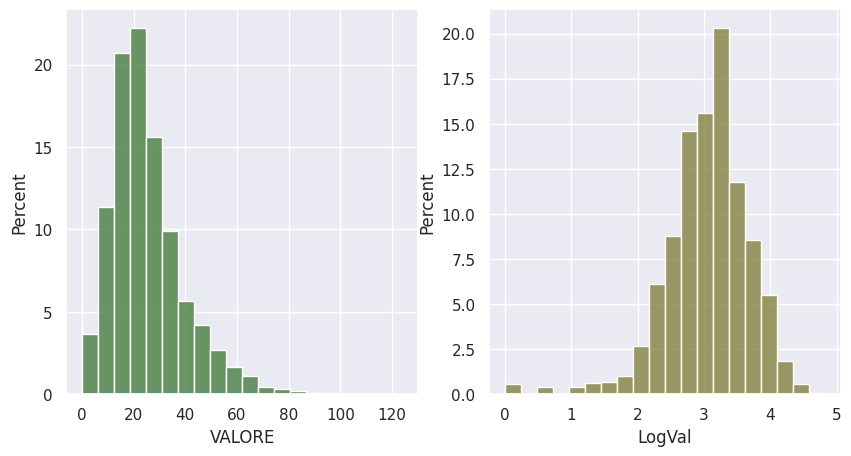

In [11]:
sns.set_theme()

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,2,1)
sns.histplot(data=final_df['VALORE'], stat='percent', bins=20, color=sns.color_palette("cubehelix",10)[3])

ax = fig.add_subplot(1,2,2)
sns.histplot(data=final_df['LogVal'], stat='percent', bins=20, color=sns.color_palette("cubehelix",10)[4])


In [12]:
sns.set_theme(style="ticks")

print(len(final_df['Stazione'].drop_duplicates().tolist()))
palette = sns.color_palette("YlOrRd",n_colors=len(final_df['Stazione'].drop_duplicates().tolist()))



49


g = sns.relplot(
    data=final_df,
    x="Date", y="VALORE",
    kind="line",hue="Stazione",palette=palette,linewidth=0.5
)
g._legend.remove()


g = sns.relplot(
    data=final_df,
    x="Date", y="LogVal",
    kind="line",hue="Stazione",palette=palette,linewidth=0.5
)
g._legend.remove()

sns.relplot(
    data=final_df,
    x="Date", y="LogVal",
    kind="line",hue="TipoStazione",palette=sns.color_palette("flare",n_colors=3),linewidth=1
)

g = sns.relplot(
    data=final_df[final_df['TipoStazione'] == 'Traffico'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("inferno",n_colors=11)
)

g = sns.relplot(
    data=final_df[final_df['TipoStazione'] == 'Industriale'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("viridis",n_colors=5)
)

g = sns.relplot(
    data=final_df[final_df['TipoStazione'] == 'Fondo'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("twilight",n_colors=33)
)

fig = plt.figure(figsize = (12,15))
ax = fig.add_subplot(1,3,1)
g = sns.relplot(
    data=final_df[final_df['TipoStazione'] == 'Traffico'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("inferno",n_colors=11)
)
ax = fig.add_subplot(1,3,2)
g = sns.relplot(
    data=final_df[final_df['TipoStazione'] == 'Industriale'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("viridis",n_colors=5)
)
ax = fig.add_subplot(1,3,3)
g = sns.relplot(
    data=final_df[final_df['TipoStazione'] == 'Fondo'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("twilight",n_colors=33)
)

# Da completare il plot sotto

<Figure size 1200x600 with 0 Axes>

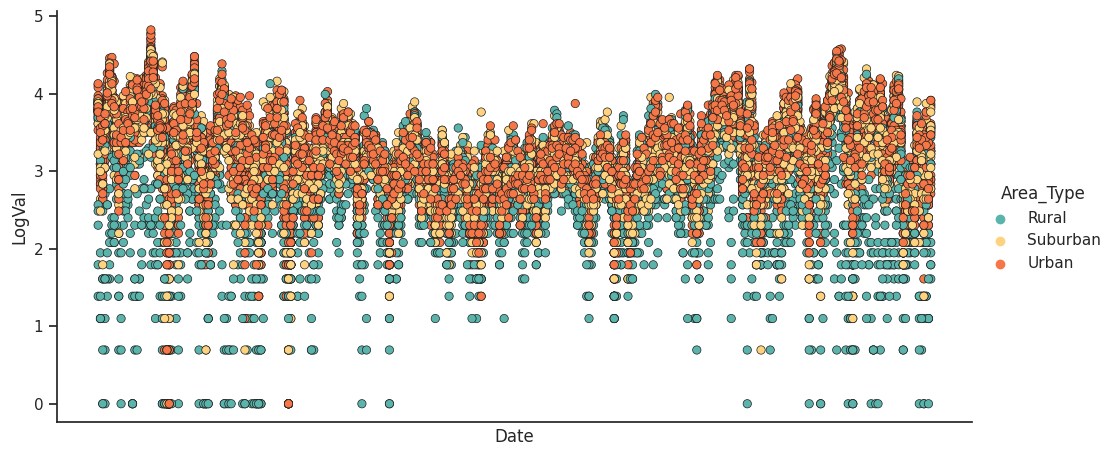

In [13]:
sns.set_theme(style="ticks")

palette = sns.color_palette("Spectral",50)
palette = [palette[41], palette[18], palette[10]]

f = plt.figure(figsize=(12, 6))
#sns.relplot(
#    data=final_df,
#    x="Date", y="LogVal",
#    kind="line",hue="TipoArea",palette=sns.color_palette("flare",n_colors=3),linewidth=1
#)

#data_wide = final_df.pivot(index='Date', columns='TipoArea', values='LogVal')

sns.relplot(
    data=final_df,
    x="Date", y="LogVal",
    kind="scatter",hue="Area_Type",palette=palette, sizes=[0.05], aspect=2,edgecolor='k'
)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)


<Figure size 1200x600 with 0 Axes>

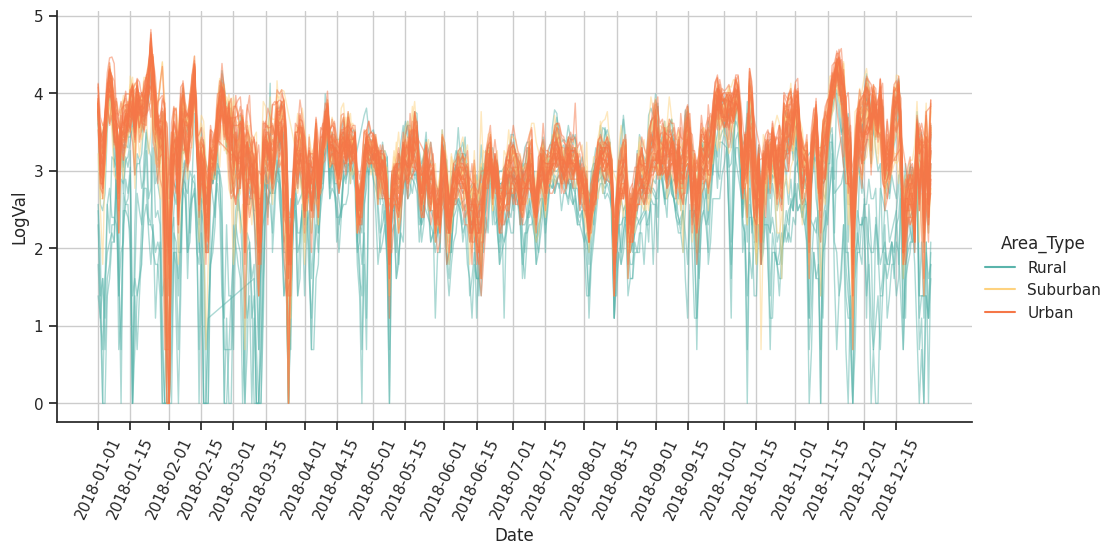

In [25]:
sns.set_theme(style="ticks")

palette = sns.color_palette("Spectral",50)
palette = [palette[41], palette[18], palette[10]]

f = plt.figure(figsize=(12, 6))
#sns.relplot(
#    data=final_df,
#    x="Date", y="LogVal",
#    kind="line",hue="TipoArea",palette=sns.color_palette("flare",n_colors=3),linewidth=1
#)

#data_wide = final_df.pivot(index='Date', columns='TipoArea', values='LogVal')

sns.relplot(
    data=final_df,
    x="Date", y="LogVal",
    palette=palette, units='Stazione',hue="Area_Type",kind="line",estimator=None,linewidth=1,alpha=0.5,aspect=2
)

primo_giorno = datetime.date(2018,1,1)
date_da_segnare = []
date_da_segnare_posizioni = []

for i in range(12):
    date_da_segnare.append(datetime.date(2018,i+1,1))
    date_da_segnare_posizioni.append((date_da_segnare[2*i] - primo_giorno).days)
    date_da_segnare.append(datetime.date(2018,i+1,15))
    date_da_segnare_posizioni.append((date_da_segnare[2*i+1] - primo_giorno).days)
    date_da_segnare[2*i] = date_da_segnare[2*i].isoformat()
    date_da_segnare[2*i+1] = date_da_segnare[2*i+1].isoformat()

plt.xticks(date_da_segnare_posizioni,date_da_segnare,rotation=65)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True)
plt.grid()

In [ ]:
print(palette[1])

In [ ]:
g = sns.relplot(
    data=final_df[final_df['TipoArea'] == 'Rurale'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("inferno",n_colors=12)
)

In [ ]:
g = sns.relplot(
    data=final_df[final_df['TipoArea'] == 'Suburbano'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("viridis",n_colors=14)
)

In [ ]:
g = sns.relplot(
    data=final_df[final_df['TipoArea'] == 'Urbano'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("twilight",n_colors=23)
)

sns.relplot(
    data=final_df,
    x="Date", y="LogVal",
    kind="line",hue="Zonizzazione",palette=sns.color_palette("flare",n_colors=4),linewidth=1
)

g = sns.relplot(
    data=final_df[final_df['Zonizzazione'] == 'Pianura Ovest'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("twilight",n_colors=23)
)

g = sns.relplot(
    data=final_df[final_df['Zonizzazione'] == 'Pianura Est'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("inferno",n_colors=18)
)

g = sns.relplot(
    data=final_df[final_df['Zonizzazione'] == 'Appennino'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("inferno",n_colors=4)
)

g = sns.relplot(
    data=final_df[final_df['Zonizzazione'] == 'Agglomerato'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("inferno",n_colors=4)
)

g = sns.relplot(
    data=final_df,
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Altezza',palette=sns.color_palette("Spectral",as_cmap=True)
)

In [ ]:
final_df = final_df.sort_values(by='Cat_Stazione_Order_By_Median')

In [ ]:
ru = datetime.date.fromisocalendar(2018,51,1)
print(ru)
rd = datetime.date.fromisocalendar(2018,52,1)
print(rd)
final_df[(final_df['Date'] >= str(ru)) & (final_df['Date'] < str(rd))]

In [ ]:
vec_mean_val = np.zeros(52)
vec_mean_log_val = np.zeros(52)
vec_std_val = np.zeros(52)
vec_std_log_val = np.zeros(52)
vec_var_val = np.zeros(52)
vec_var_log_val = np.zeros(52)

for i in range(51):
    ru = datetime.date.fromisocalendar(2018,i+1,1)
    rd = datetime.date.fromisocalendar(2018,i+2,1)
    aux_df = final_df[(final_df['Date'] >= str(ru)) & (final_df['Date'] < str(rd))]    
    vec_mean_val[i] = np.mean(aux_df['VALORE'].to_numpy())
    vec_mean_log_val[i] = np.mean(aux_df['LogVal'].to_numpy())
    vec_std_val[i] = np.std(aux_df['VALORE'].to_numpy(),ddof=1)
    vec_std_log_val[i] = np.std(aux_df['LogVal'].to_numpy(),ddof=1)
    vec_var_val[i] = np.var(aux_df['VALORE'].to_numpy(),ddof=1)
    vec_var_log_val[i] = np.var(aux_df['LogVal'].to_numpy(),ddof=1)
    
    
ru = datetime.date.fromisocalendar(2018,52,1)
rd = datetime.date.fromisocalendar(2018,52,7)
aux_df = final_df[(final_df['Date'] >= str(ru)) & (final_df['Date'] < str(rd))]
vec_mean_val[51] = np.mean(aux_df['VALORE'].to_numpy())
vec_mean_log_val[51] = np.mean(aux_df['LogVal'].to_numpy())
vec_std_val[51] = np.std(aux_df['VALORE'].to_numpy(),ddof=1)
vec_std_log_val[51] = np.std(aux_df['LogVal'].to_numpy(),ddof=1)
vec_var_val[51] = np.var(aux_df['VALORE'].to_numpy(),ddof=1)
vec_var_log_val[51] = np.var(aux_df['LogVal'].to_numpy(),ddof=1)


d = {'week' : np.arange(1,53,1).tolist(),
    'mean_val' : vec_mean_val.tolist(), 
    'mean_log_val' : vec_mean_log_val.tolist(),
    'std_val' : vec_std_val.tolist(),
    'std_log_val' : vec_std_log_val.tolist(),
    'var_val' : vec_var_val.tolist(),
    'var_log_val' : vec_var_log_val.tolist()}

week_stats_df = pd.DataFrame(data = d)

In [ ]:
sns.set_theme()
sns.pairplot(week_stats_df[['week','mean_val','std_val','var_val']])

In [ ]:
sns.pairplot(week_stats_df[['week','mean_log_val','std_log_val','var_log_val']])

In [ ]:
import warnings
warnings.filterwarnings('ignore')


# Theme
sns.set_theme(style="ticks",rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)

# create a grid with a row for each 'Language'
g = sns.FacetGrid(final_df, palette=palette, row="Mese", hue="Mese", aspect=10, height=0.7)

# map df - Kernel Density Plot of IMDB Score for each Language
g.map_dataframe(sns.kdeplot, x="LogVal", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="LogVal", color='black')

# function to draw labels
def label(x, color, label):
    ax = plt.gca() #get current axis
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
# iterate grid to plot labels
g.map(label, "Mese")

# adjust subplots to create overlap
g.fig.subplots_adjust(hspace=-.5)

# remove subplot titles
g.set_titles("")

# remove yticks and set xlabel
g.set(yticks=[], xlabel="LogVal",ylabel="")
# remove left spine
g.despine(left=True)




In [ ]:
sns.set_theme(style="ticks")

palette = sns.color_palette("Spectral",50)
palette = [palette[41], palette[18], palette[10]]


# Plot the orbital period with horizontal boxes
#f, ax = plt.subplots(figsize=(10, 18))
#sns.boxplot(y="Stazione", x="LogVal", data=final_df,
#           width=0.85, hue='TipoArea', orient='h', dodge=False, palette="vlag")
f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x="Station", y="LogVal", data=final_df,
           width=0.8, hue='Area_Type', orient='v', dodge=False, palette=palette, flierprops={"marker": "o"}, fliersize = 2.5)
plt.xticks(rotation=90)

ax.set(ylabel="LogVal")

# Tweak the visual presentation
#ax.xaxis.grid(True)
#ax.set(ylabel="")
#sns.despine(trim=True, left=True)